## 1. Анализ тарифов
___
## 1. Analysis of tariffs

- Необходимо совершить предварительный анализ различных тарифов на выборке клиентов.
- Доступны данные 500 пользователей за 2018 год.
- Нужно, проанализировав поведение клиентов, сделать вывод - какой тариф лучше.
___
- It is necessary to make a preliminary analysis of various tariffs on a sample of customers.
- Data of 500 users for 2018 is available.
- After analyzing the behavior of customers, it is necessary to draw a conclusion - which tariff is better.

**Основные гипотезы**
___
**Main hypotheses**

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.


alpha = .05 по умолчанию

## 2. Исследование данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
df_users = pd.read_csv('users.csv', sep=",")
df_tariffs = pd.read_csv('tariffs.csv', sep=",")
df_messages = pd.read_csv('messages.csv', sep=",")
df_internet = pd.read_csv('internet.csv', sep=",", index_col=0)
df_calls = pd.read_csv('calls.csv', sep=",")

In [4]:
display(df_users.head(5))
df_users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [5]:
df_users.duplicated().mean()

0.0

In [6]:
print("Процентное содержание пропусков:", df_users.isnull().mean()*100)

Процентное содержание пропусков: user_id       0.00
age           0.00
churn_date   92.40
city          0.00
first_name    0.00
last_name     0.00
reg_date      0.00
tariff        0.00
dtype: float64


In [7]:
df_users['churn_date'] = df_users['churn_date'].fillna('2018-12-31')

In [8]:
df_users['user_id'].nunique()

500

In [9]:
display(df_tariffs.head(5))
df_tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [10]:
df_tariffs.duplicated().sum()

0

In [11]:
display(df_messages.head(5))
df_messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [12]:
df_messages.duplicated().mean()

0.0

In [13]:
df_messages['user_id'].nunique()

426

In [14]:
print("Процентное содержание пропусков:", df_messages.isnull().mean()*100)

Процентное содержание пропусков: id             0.00
message_date   0.00
user_id        0.00
dtype: float64


In [15]:
display(df_internet.head(5))
df_internet.info()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,"1,052.81",2018-09-07,1000
2,1000_2,"1,197.26",2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [16]:
df_internet.duplicated().mean()

0.0

In [17]:
df_internet['user_id'].nunique()

497

In [18]:
print("Процентное содержание пропусков:",df_internet.isnull().mean()*100)

Процентное содержание пропусков: id             0.00
mb_used        0.00
session_date   0.00
user_id        0.00
dtype: float64


array([[<AxesSubplot:title={'center':'mb_used'}>,
        <AxesSubplot:title={'center':'user_id'}>]], dtype=object)

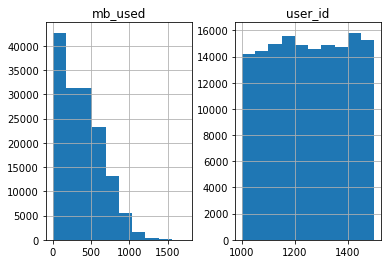

In [19]:
df_internet.hist()

<AxesSubplot:>

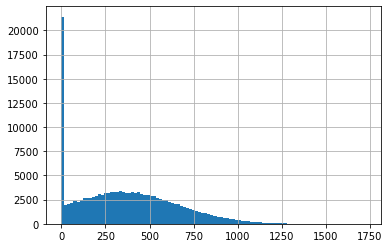

In [20]:
df_internet['mb_used'].hist(bins = 100)

<AxesSubplot:>

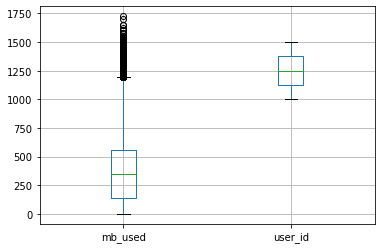

In [21]:
df_internet.boxplot() 

In [22]:
df_internet[df_internet['mb_used'] == 0].count()

id              19598
mb_used         19598
session_date    19598
user_id         19598
dtype: int64

Необходимо избавиться от мешающих нормальным подсчетам аномалий.
___
It is necessary to get rid of anomalies interfering with normal calculations.

In [23]:
df_internet = df_internet.drop(np.where(df_internet['mb_used'] == 0)[0])

In [24]:
df_internet[df_internet['mb_used'] == 0].count()

id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

<AxesSubplot:>

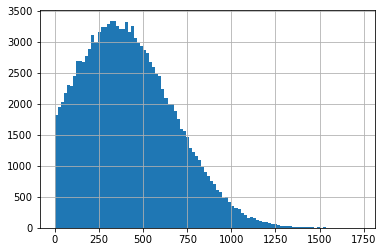

In [25]:
df_internet['mb_used'].hist(bins = 100)

<AxesSubplot:>

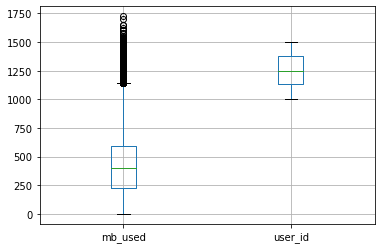

In [26]:
df_internet.boxplot() 

Аномалии убраны, данные похожи на правдоподобные.
___
Anomalies are removed, the data is similar to believable.

In [27]:
display(df_calls.head(5))
df_calls.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [28]:
df_calls.duplicated().mean()

0.0

In [29]:
df_calls['user_id'].nunique()

492

In [30]:
print("Процентное содержание пропусков:", df_calls.isnull().mean()*100)

Процентное содержание пропусков: id          0.00
call_date   0.00
duration    0.00
user_id     0.00
dtype: float64


- Проблема аномалий в датафрейме интернет-сессий решена;
- Дата прекращения пользования тарифами была изменена в случае NaN на последний день 2018 года, чтобы была возможность производить подсчеты и не терять данные;
- Была проверена уникальность первичных ключей в таблицах, обнаружено различное количество уникальных значений.
___
- The problem of anomalies in the dataframe of Internet sessions is solved;
- The tariff expiration date has been changed in the case of NaN to the last day of 2018 in order to be able to make calculations and not lose data;
- The uniqueness of the primary keys in the tables was checked, a different number of unique values were found.

## 3. Предобработка данных
___
## 3. Data preprocessing

**Приведение данных к нужным типам**
___
**Correction of data to the required types**

In [31]:
df_users = df_users.astype({ "user_id": "int32", "age": "int32", "churn_date": "datetime64", "reg_date": "datetime64"})

In [32]:
df_tariffs = df_tariffs.astype({ "messages_included": "int32", "mb_per_month_included": "int32", "minutes_included": "int32", "rub_monthly_fee": "int32", "rub_per_gb": "int32", "rub_per_message": "int32", "rub_per_minute": "int32"})

In [33]:
df_messages = df_messages.astype({ "user_id": "int32", "message_date": "datetime64"})

In [34]:
df_internet = df_internet.astype({ "mb_used": "float32", "session_date": "datetime64", "user_id": "int32"})

Пришлось обратиться к данному методу только в случае одной таблицы, в других нужная информация могла стать индексом.
___
I had to turn to this method only in the case of one table, in others the necessary information could become an index.

In [35]:
df_calls = df_calls.astype({ "user_id": "int32", "call_date": "datetime64"})

In [36]:
df_calls['duration'] = np.ceil(df_calls['duration'])

Пояснение

Данные преобразованы в корректные типы, в некоторых случаях в более "легкие" для меньшего использования памяти.
___
Explanation

The data is converted to the correct types, in some cases more "light" ones for less memory usage.

**Подсчеты**
___
**Calculation**

Количество сделанных звонков и израсходованных минут разговора по месяцам
___
Number of calls made and spent minutes of conversation by month

In [37]:
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month

In [38]:
pt_df_calls = df_calls.pivot_table(index=['month', 'user_id'], values=['duration'],  aggfunc={'sum', 'count'})

In [39]:
pt_df_calls.columns = ['count_calls', 'spent_minutes']

In [40]:
pt_df_calls

count_calls  spent_minutes
month user_id                            
1     1005              15          95.00
      1032              61         380.00
      1045               1           9.00
      1055              64         551.00
      1071              24         194.00
...                    ...            ...
12    1494              62         418.00
      1495             155       1,031.00
      1496              80         518.00
      1497              71         545.00
      1499              69         492.00

[3174 rows x 2 columns]

Количество отправленных сообщений по месяцам
___
Number of messages sent by month

In [41]:
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month

In [42]:
pt_df_messages = df_messages.pivot_table(index=['month', 'user_id'], values=['id'],  aggfunc={'id': 'count'})

In [43]:
pt_df_messages.rename(columns = {'id':'messages'})

messages
month user_id          
1     1005            7
      1032           38
      1045            5
      1055           30
      1071           16
...                 ...
12    1493           78
      1495           84
      1496           51
      1497           17
      1499           66

[2717 rows x 1 columns]

Объем израсходованного интернет-трафика по месяцам
___
The amount of Internet traffic used by months

In [44]:
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month

In [45]:
pt_df_internet = df_internet.pivot_table(index=['month', 'user_id'], values=['mb_used'],  aggfunc={'mb_used': 'sum'})

In [46]:
pt_df_internet['mb_used'] = pt_df_internet['mb_used']/1024
pt_df_internet = pt_df_internet.rename(columns = {'mb_used':'gb_used'})

In [47]:
pt_df_internet

gb_used
month user_id         
1     1005        2.66
      1032       23.56
      1045        2.29
      1055       16.69
      1071       15.24
...                ...
12    1494       17.21
      1495       22.88
      1496       20.25
      1497       19.45
      1499       12.75

[3201 rows x 1 columns]

In [48]:
pt_df_internet['gb_used'] = np.ceil(pt_df_internet['gb_used'])

In [49]:
pt_df_internet

gb_used
month user_id         
1     1005        3.00
      1032       24.00
      1045        3.00
      1055       17.00
      1071       16.00
...                ...
12    1494       18.00
      1495       23.00
      1496       21.00
      1497       20.00
      1499       13.00

[3201 rows x 1 columns]

Помесячная выручка с каждого пользователя (вычитание бесплатного лимита из суммарного количества звонков, сообщений и интернет-трафика; остаток умножить на значение из тарифного плана; прибавить абонентскую плату, соответствующую тарифному плану)
___
Monthly revenue from each user (subtracting the free limit from the total number of calls, messages and Internet traffic; multiply the remainder by the value from the tariff plan; add the subscription fee corresponding to the tariff plan)

In [50]:
group_mess_call = pt_df_messages.merge(pt_df_calls, on = ['month', 'user_id'], how = 'outer')

In [51]:
group_mess_call

id  count_calls  spent_minutes
month user_id                                  
1     1005     7.00        15.00          95.00
      1032    38.00        61.00         380.00
      1045     5.00         1.00           9.00
      1055    30.00        64.00         551.00
      1071    16.00        24.00         194.00
...             ...          ...            ...
12    1462      NaN       136.00         878.00
      1466      NaN        82.00         659.00
      1469      NaN       106.00         635.00
      1479      NaN        81.00         576.00
      1494      NaN        62.00         418.00

[3213 rows x 3 columns]

In [52]:
group_mess_call_int = group_mess_call.merge(pt_df_internet, on = ['month', 'user_id'], how = 'outer').reset_index()

In [53]:
group_mess_call_int

,month,user_id,id,count_calls,spent_minutes,gb_used
0,1,1005,7.00,15.00,95.00,3.00
1,1,1032,38.00,61.00,380.00,24.00
2,1,1045,5.00,1.00,9.00,3.00
3,1,1055,30.00,64.00,551.00,17.00
4,1,1071,16.00,24.00,194.00,16.00
...,...,...,...,...,...,...
3209,12,1466,NaN,82.00,659.00,15.00
3210,12,1469,NaN,106.00,635.00,28.00
3211,12,1479,NaN,81.00,576.00,23.00
3212,12,1494,NaN,62.00,418.00,18.00


In [54]:
general_df = group_mess_call_int.merge(df_users[['user_id', 'city', 'tariff']], on = ['user_id'], how = 'outer')

In [55]:
general_df = general_df.rename(columns = {'id':'messages'})

In [56]:
general_df.head(5)

,month,user_id,messages,count_calls,spent_minutes,gb_used,city,tariff
0,1.00,1005,7.00,15.00,95.00,3.00,Набережные Челны,smart
1,2.00,1005,38.00,69.00,456.00,8.00,Набережные Челны,smart
2,3.00,1005,56.00,77.00,606.00,11.00,Набережные Челны,smart
3,4.00,1005,41.00,101.00,712.00,10.00,Набережные Челны,smart
4,5.00,1005,42.00,73.00,595.00,8.00,Набережные Челны,smart


In [57]:
general_df[(general_df.count_calls.isna()) & (general_df.messages.notna())]

,month,user_id,messages,count_calls,spent_minutes,gb_used,city,tariff
277,6.00,1373,48.00,NaN,NaN,13.00,Улан-Удэ,smart
1143,4.00,1106,9.00,NaN,NaN,3.00,Калуга,ultra
1144,5.00,1106,28.00,NaN,NaN,17.00,Калуга,ultra
1145,6.00,1106,30.00,NaN,NaN,20.00,Калуга,ultra
1146,7.00,1106,24.00,NaN,NaN,22.00,Калуга,ultra
1147,8.00,1106,25.00,NaN,NaN,19.00,Калуга,ultra
1148,9.00,1106,23.00,NaN,NaN,22.00,Калуга,ultra
1149,10.00,1106,33.00,NaN,NaN,14.00,Калуга,ultra
1150,11.00,1106,29.00,NaN,NaN,21.00,Калуга,ultra
1151,12.00,1106,24.00,NaN,NaN,19.00,Калуга,ultra


In [58]:
print("Процентное содержание пропусков:", general_df.isnull().mean()*100)

Процентное содержание пропусков: month            0.06
user_id          0.00
messages        15.52
count_calls      1.31
spent_minutes    1.31
gb_used          0.47
city             0.00
tariff           0.00
dtype: float64


In [59]:
general_df = general_df.fillna(value=0)

In [60]:
print("Процентное содержание пропусков:", general_df.isnull().mean()*100)

Процентное содержание пропусков: month           0.00
user_id         0.00
messages        0.00
count_calls     0.00
spent_minutes   0.00
gb_used         0.00
city            0.00
tariff          0.00
dtype: float64


In [61]:
general_df.head(5)

,month,user_id,messages,count_calls,spent_minutes,gb_used,city,tariff
0,1.00,1005,7.00,15.00,95.00,3.00,Набережные Челны,smart
1,2.00,1005,38.00,69.00,456.00,8.00,Набережные Челны,smart
2,3.00,1005,56.00,77.00,606.00,11.00,Набережные Челны,smart
3,4.00,1005,41.00,101.00,712.00,10.00,Набережные Челны,smart
4,5.00,1005,42.00,73.00,595.00,8.00,Набережные Челны,smart


In [62]:
general_df['month'] = general_df['month'].drop(np.where(general_df['month'] == 0)[0])

In [63]:
general_df = general_df.dropna()

In [64]:
general_df.head(5)

,month,user_id,messages,count_calls,spent_minutes,gb_used,city,tariff
0,1.00,1005,7.00,15.00,95.00,3.00,Набережные Челны,smart
1,2.00,1005,38.00,69.00,456.00,8.00,Набережные Челны,smart
2,3.00,1005,56.00,77.00,606.00,11.00,Набережные Челны,smart
3,4.00,1005,41.00,101.00,712.00,10.00,Набережные Челны,smart
4,5.00,1005,42.00,73.00,595.00,8.00,Набережные Челны,smart


In [65]:
df_tariffs['mb_per_month_included'] = df_tariffs['mb_per_month_included']/1024

In [66]:
df_tariffs = df_tariffs.rename(columns = {'mb_per_month_included':'gb_per_month_included'})

In [67]:
general_df_с = general_df.copy()

In [68]:
def income(row):
    pay = 0
    if row['tariff'] == 'ultra':
        pay = pay + df_tariffs['rub_monthly_fee'][1]
        if row['spent_minutes'] > df_tariffs['minutes_included'][1]:
            pay += ((row['spent_minutes'] - df_tariffs['minutes_included'][1])*df_tariffs['rub_per_minute'][1])
        if row['gb_used'] > df_tariffs['gb_per_month_included'][1]:
            pay += ((row['gb_used'] - df_tariffs['gb_per_month_included'][1])*df_tariffs['rub_per_gb'][1])
        if row['messages'] > df_tariffs['messages_included'][1]:
            pay += ((row['messages'] - df_tariffs['messages_included'][1])*df_tariffs['rub_per_message'][1])
    else:
        pay = pay + df_tariffs['rub_monthly_fee'][0]
        if row['spent_minutes'] > df_tariffs['minutes_included'][0]:
            pay += ((row['spent_minutes'] - df_tariffs['minutes_included'][0])*df_tariffs['rub_per_minute'][0])
        if row['gb_used'] > df_tariffs['gb_per_month_included'][0]:
            pay += ((row['gb_used'] - df_tariffs['gb_per_month_included'][0])*df_tariffs['rub_per_gb'][0])
        if row['messages'] > df_tariffs['messages_included'][0]:
            pay += ((row['messages'] - df_tariffs['messages_included'][0])*df_tariffs['rub_per_message'][0])
    return pay

general_df_с['pay'] = general_df_с.apply(income, axis=1)


In [69]:
general_df_с

,month,user_id,messages,count_calls,spent_minutes,gb_used,city,tariff,pay
0,1.00,1005,7.00,15.00,95.00,3.00,Набережные Челны,smart,550.00
1,2.00,1005,38.00,69.00,456.00,8.00,Набережные Челны,smart,550.00
2,3.00,1005,56.00,77.00,606.00,11.00,Набережные Челны,smart,886.00
3,4.00,1005,41.00,101.00,712.00,10.00,Набережные Челны,smart,"1,186.00"
4,5.00,1005,42.00,73.00,595.00,8.00,Набережные Челны,smart,835.00
...,...,...,...,...,...,...,...,...,...
3209,12.00,1095,0.00,64.00,540.00,18.00,Новосибирск,smart,"1,270.00"
3210,12.00,1117,0.00,36.00,282.00,12.00,Тюмень,smart,550.00
3211,12.00,1129,0.00,60.00,452.00,17.00,Курган,smart,950.00
3212,12.00,1297,0.00,47.00,404.00,19.00,Иркутск,smart,"1,350.00"


Все необходимые подсчеты произведены. Приступаем к анализу данных!
___
All necessary calculations have been made. Let's start analyzing the data!

In [70]:
general_df_с['pay'].sum()

4914451.0

In [71]:
general_df_с[general_df_с['spent_minutes'] > 500]

,month,user_id,messages,count_calls,spent_minutes,gb_used,city,tariff,pay
2,3.00,1005,56.00,77.00,606.00,11.00,Набережные Челны,smart,886.00
3,4.00,1005,41.00,101.00,712.00,10.00,Набережные Челны,smart,"1,186.00"
4,5.00,1005,42.00,73.00,595.00,8.00,Набережные Челны,smart,835.00
5,6.00,1005,47.00,80.00,612.00,10.00,Набережные Челны,smart,886.00
6,7.00,1005,56.00,77.00,569.00,8.00,Набережные Челны,smart,775.00
...,...,...,...,...,...,...,...,...,...
3193,12.00,1305,0.00,87.00,645.00,21.00,Москва,smart,"2,185.00"
3195,11.00,1462,0.00,126.00,933.00,23.00,Тольятти,smart,"3,449.00"
3196,12.00,1462,0.00,136.00,878.00,24.00,Тольятти,smart,"3,484.00"
3200,12.00,1220,0.00,102.00,766.00,21.00,Ростов-на-Дону,smart,"2,548.00"


In [72]:
general_df_с[(general_df_с['spent_minutes'] > 500) & (general_df_с['user_id'] == 1499)]

,month,user_id,messages,count_calls,spent_minutes,gb_used,city,tariff,pay
2518,11.00,1499,59.00,74.00,612.00,18.00,Пермь,smart,"1,513.00"


## 4. Анализ данных
___
## 4. Data analysis

Описание поведения клиентов оператора, исходя из выборки.
___
Description of the behavior of the operator's clients, based on the sample.

Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
___
How many minutes of conversation, how many messages and how much Internet traffic do users of each tariff need per month?

In [73]:
av_general_df = general_df_с.pivot_table(index=['month', 'tariff'], values=['spent_minutes', 'messages', 'gb_used'],  aggfunc={'spent_minutes': 'sum', 'messages': 'sum', 'gb_used': 'sum'})
av_general_df

gb_used  messages  spent_minutes
month tariff                                  
1.00  smart    297.00    620.00       6,931.00
      ultra    119.00    304.00       3,853.00
2.00  smart    687.00  1,397.00      17,324.00
      ultra    288.00    527.00       7,131.00
3.00  smart  1,173.00  2,453.00      30,034.00
      ultra    653.00  1,195.00      18,117.00
4.00  smart  1,526.00  3,443.00      41,119.00
      ultra    933.00  1,736.00      25,191.00
5.00  smart  2,243.00  4,762.00      54,618.00
      ultra  1,298.00  2,536.00      34,192.00
6.00  smart  2,616.00  5,478.00      64,885.00
      ultra  1,591.00  3,505.00      40,295.00
7.00  smart  3,191.00  6,784.00      82,079.00
      ultra  1,866.00  4,536.00      49,667.00
8.00  smart  3,933.00  7,905.00      99,045.00
      ultra  2,097.00  5,183.00      54,653.00
9.00  smart  4,262.00  8,746.00     111,439.00
      ultra  2,213.00  6,013.00      62,036.00
10.00 smart  4,963.00  9,927.00     125,284.00
      ultra  2,468.00  7,187.00      68,644.00
11.00 smart  5,372.00 10,768.00     137,544.00
      ultra  2,654.00  7,476.00      72,545.00
12.00 smart  6,134.00 12,130.00     161,275.00
      ultra  3,022.00  8,425.00      82,400.00

Подсчет среднего количества, дисперсии и стандартного отклонения.
___
Calculation of the mean, variance and standard deviation.

In [74]:
general_df_с.groupby(['tariff']).agg(['var', 'std'])

month        user_id        messages       count_calls        \
         var  std       var    std      var   std         var   std   
tariff                                                                
smart   8.53 2.92 21,350.91 146.12   796.81 28.23      672.88 25.94   
ultra   8.25 2.87 19,795.06 140.69 2,285.27 47.80    1,928.69 43.92   

       spent_minutes        gb_used             pay         
                 var    std     var  std        var    std  
tariff                                                      
smart      36,219.32 190.31   33.03 5.75 669,785.71 818.40  
ultra     100,873.63 317.61   97.09 9.85 141,516.75 376.19

Визуализация с помощью гистограмм. 
___
Visualization with histograms.

In [75]:
general_df_с.head(5)

,month,user_id,messages,count_calls,spent_minutes,gb_used,city,tariff,pay
0,1.00,1005,7.00,15.00,95.00,3.00,Набережные Челны,smart,550.00
1,2.00,1005,38.00,69.00,456.00,8.00,Набережные Челны,smart,550.00
2,3.00,1005,56.00,77.00,606.00,11.00,Набережные Челны,smart,886.00
3,4.00,1005,41.00,101.00,712.00,10.00,Набережные Челны,smart,"1,186.00"
4,5.00,1005,42.00,73.00,595.00,8.00,Набережные Челны,smart,835.00


In [76]:
general_df_с = general_df_с.astype({"month":"int32", "messages":"int32", "count_calls":"int32", "spent_minutes":"int32", "gb_used":"int32", "pay":"int32"})

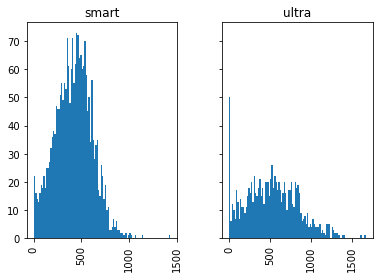

In [77]:
general_df_с.hist(column='spent_minutes', by='tariff', bins=100, sharey = True) ;

In [78]:
general_df_с.query('tariff == "ultra"')['spent_minutes'].describe()

count     985.00
mean      526.62
std       317.61
min         0.00
25%       284.00
50%       518.00
75%       752.00
max     1,673.00
Name: spent_minutes, dtype: float64

In [79]:
general_df_с.query('tariff == "smart"')['spent_minutes'].describe()

count   2,229.00
mean      417.93
std       190.31
min         0.00
25%       282.00
50%       422.00
75%       545.00
max     1,435.00
Name: spent_minutes, dtype: float64

Из гистограмм видно нормальное распределение информации с пиком в области значения количества минут, равном 500. Визуальные данные подтверждаются усредненными данными. 
Однако стоит отметить, что клиенты с тарифом **ultra** используют большее количество минут в среднем - 557 (в сравнении с 421 при **smart**).
___
The histograms show a normal distribution of information with a peak in the area of the number of minutes value equal to 500. The visual data is confirmed by the averaged data.
However, it is worth noting that **ultra** customers use more minutes on average - 557 (compared to 421 with **smart**).

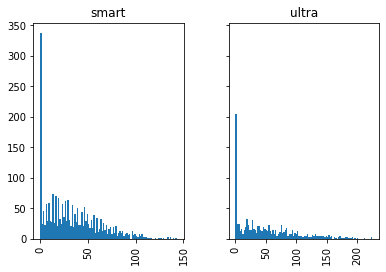

In [80]:
general_df_с.hist(column='messages', by='tariff', bins=100, sharey = True) ;

In [81]:
general_df_с.query('tariff == "ultra"')['messages'].describe()

count   985.00
mean     49.36
std      47.80
min       0.00
25%       6.00
50%      38.00
75%      79.00
max     224.00
Name: messages, dtype: float64

In [82]:
general_df_с.query('tariff == "smart"')['messages'].describe()

count   2,229.00
mean       33.38
std        28.23
min         0.00
25%        10.00
50%        28.00
75%        51.00
max       143.00
Name: messages, dtype: float64

Из гистограмм видно нормальное распределение информации в случае обоих тарифов. Однако стоит отметить, что клиенты с тарифом ultra используют большее количество сообщений, в среднем - 61.72 (в сравнении с 38.79 при smart). Разница довольно велика.
___
The histograms show the normal distribution of information in the case of both tariffs. However, it's worth noting that ultra customers use more messages, averaging 61.72 (compared to 38.79 for smart). The difference is quite big.

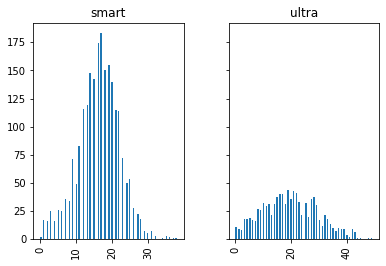

In [83]:
general_df_с.hist(column='gb_used', by='tariff', bins=100, sharey = True) ;

In [84]:
general_df_с.query('tariff == "ultra"')['gb_used'].describe()

count   985.00
mean     19.49
std       9.85
min       0.00
25%      12.00
50%      19.00
75%      27.00
max      49.00
Name: gb_used, dtype: float64

In [85]:
general_df_с.query('tariff == "smart"')['gb_used'].describe()

count   2,229.00
mean       16.33
std         5.75
min         0.00
25%        13.00
50%        17.00
75%        20.00
max        38.00
Name: gb_used, dtype: float64

Из гистограмм видно нормальное распределение информации в случае обоих тарифов. Однако стоит отметить, что клиенты с тарифом ultra используют большее количество гигабайт, в среднем - 19.64 (в сравнении с 16.37 при smart). 
___
The histograms show the normal distribution of information in the case of both tariffs. However, it's worth noting that ultra customers use more gigabytes, averaging 19.64 (compared to 16.37 for smart).

## 5. Проверка гипотез
___
## 5. Hypothesis testing

**Гипотеза №1**: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

- Нулевая гипотеза - "Средняя выручка пользователей тарифов «Ультра» и «Смарт» равна";
- Альтернативная гипотеза - "Средняя выручка пользователей тарифов «Ультра» и «Смарт» не равна"
___
**Hypothesis No. 1**: the average revenue of users of the Ultra and Smart tariffs are different

- Null hypothesis - "The average revenue of users of tariffs "Ultra" and "Smart" is equal to";
- Alternative hypothesis - "The average revenue of users of the "Ultra" and "Smart" tariffs is not equal"

In [86]:
sample_1 = general_df_с[general_df_с['tariff'] == 'ultra']['pay']
sample_2 = general_df_с[general_df_с['tariff'] == 'smart']['pay']

alpha = .05

results = st.ttest_ind(sample_1, sample_2, equal_var = True)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.4229814360764067e-160
Отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, что cредняя выручка пользователей тарифов «Ультра» и «Смарт» не равны. С вероятностью в 1.4229814360764067e-160 такое или большее различие можно получить случайно. Данная вероятность достаточно мала, чтобы делать вывод о значимом различии между выручками пользователей тарифов «Ультра» и «Смарт».
___
The resulting p-value indicates that the average revenue of users of the Ultra and Smart tariffs are not equal. With a probability of 1.4229814360764067e-160, such or greater difference can be obtained by chance. This probability is small enough to conclude that there is a significant difference between the revenues of users of the Ultra and Smart tariffs.

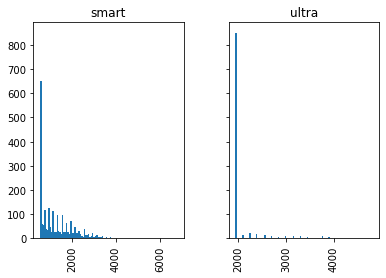

In [87]:
general_df_с.hist(column='pay', by='tariff', bins=100, sharey = True) ;

In [88]:
general_df_с.query('tariff == "ultra"')['pay'].describe()

count     985.00
mean    2,070.15
std       376.19
min     1,950.00
25%     1,950.00
50%     1,950.00
75%     1,950.00
max     4,800.00
Name: pay, dtype: float64

In [89]:
general_df_с.query('tariff == "smart"')['pay'].describe()

count   2,229.00
mean    1,289.97
std       818.40
min       550.00
25%       550.00
50%     1,023.00
75%     1,750.00
max     6,770.00
Name: pay, dtype: float64

In [90]:
tariff_diff = general_df_с.query('tariff == "ultra"')['pay'].mean()/general_df_с.query('tariff == "smart"')['pay'].mean()

In [91]:
tariff_diff

1.6048021412427091

Из описания видно, что выручка различается в 1.61 раза, то есть на почти 61% больше в случае тарифа **ultra**, что, в свою очередь, говорит о его **выгодности** для компании.
___
From the description it can be seen that the revenue differs by 1.61 times, that is, almost 61% more in the case of the **ultra** tariff, which, in turn, indicates its **profitability** for the company.

**Гипотеза №2**:средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

- Нулевая гипотеза - "Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов";
- Альтернативная гипотеза - "Средняя выручка пользователей из Москвы не равна выручке пользователей из других регионов"
___
**Hypothesis #2**: The average revenue of users from Moscow differs from the revenue of users from other regions

- Null hypothesis - "The average revenue of users from Moscow is equal to the revenue of users from other regions";
- Alternative hypothesis - "The average revenue of users from Moscow is not equal to the revenue of users from other regions"

In [92]:
sample_1 = general_df_с[general_df_с['city'] == 'Москва']['pay']
sample_2 = general_df_с[general_df_с['city'] != 'Москва']['pay']

alpha = .05

results = st.ttest_ind(sample_1, sample_2, equal_var = True)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что хотя cредняя выручка пользователей из Москвы и других городов не равнозначны, с вероятностью в 54,4% такое или большее различие можно получить случайно. Данная вероятность слишком велика, чтобы делать вывод о значимом различии между выручками жителей Мсоквы и других городов.
___
The resulting p-value indicates that although the average revenue of users from Moscow and other cities is not equivalent, with a probability of 54.4% such a difference or more can be obtained by chance. This probability is too high to conclude that there is a significant difference between the incomes of residents of Moscow and other cities.

In [93]:
sample_1.describe()

count     611.00
mean    1,546.71
std       752.09
min       550.00
25%       780.50
50%     1,750.00
75%     1,950.00
max     5,321.00
Name: pay, dtype: float64

In [94]:
sample_2.describe()

count   2,603.00
mean    1,524.94
std       808.79
min       550.00
25%       750.00
50%     1,583.00
75%     1,950.00
max     6,770.00
Name: pay, dtype: float64

Из описательных величин видно малозначительное различие в цифрах.
___
The descriptive values show little difference in numbers.

## 6. Выводы
___
## 6. Conclusions

В результате исследования было выяснено, что клиенты с тарифом **ultra** используют:

- большее количество минут в среднем - 557 (в сравнении с 421 при **smart**);
- большее количество сообщений, в среднем - 61.72 (в сравнении с 38.79 при **smart**). Разница довольно велика;
- большее количество гигабайт, в среднем - 19.64 (в сравнении с 16.37 при **smart**).

Предпосылки к этому ясны, тариф **ultra** дает сравнительно больший ресурс. 

Пользователи тарифа **smart** стараются не превышать траты на связь, это очевидно из данных, они в среднем не превышают лимит тарифа, **за исключением интернет-трафика** - 16.37 Гб в среднем. Это превышение - возможность для заработка компании.

Но даже в случае превышения лимита пользователями тарифа **smart**, выручка от пользователей с тарифом **ultra** выше, разница значительна.

С точки зрения клиента - лучше тариф **smart**, даже в случае переплат траты меньше чем в случае исключительно абонентской платы за тариф **ultra**.

С точки зрения компании - лучше тариф **ultra**, и вероятно стоит более прицельно его рекламировать, добавить большее количество сообщений и интернета в лимит для привлекательности. Поведение клиентов показывает довольно ровную линию, даже в случае условного добавления ряда услуг - их востребованность будет не так велика, соответственно дополнительных затрат также не будет в значительном объеме.

Другой вариант - незначительно уменьшить цену на тариф **ultra** и поднять на **smart**, чтобы сгладить впечатление о резком контрасте между ними.
___
As a result of the study, it was found that customers with the **ultra** tariff use:

- more minutes on average - 557 (compared to 421 with **smart**);
- more messages, on average - 61.72 (compared to 38.79 with **smart**). The difference is quite large;
- more gigabytes, on average - 19.64 (compared to 16.37 with **smart**).

The prerequisites for this are clear, the **ultra** tariff gives a relatively larger resource.

**smart** tariff users try not to exceed the communication costs, it is obvious from the data, they do not exceed the tariff limit on average, **excluding Internet traffic** - 16.37 GB on average. This excess is an opportunity for the company to earn.

But even if users of the **smart** tariff exceed the limit, the revenue from users with the **ultra** tariff is higher, the difference is significant.

From the point of view of the client, the **smart** tariff is better, even in case of overpayments, the spending is less than in the case of an exclusively subscription fee for the **ultra** tariff.

From the point of view of the company, the **ultra** tariff is better, and it is probably worth advertising it more precisely, adding more messages and the Internet to the limit for attractiveness. The behavior of customers shows a fairly flat line, even in the case of the conditional addition of a number of services - their demand will not be so great, respectively, additional costs will not be significant either.

Another option is to slightly reduce the price of the **ultra** fare and raise it by **smart** to smooth out the sharp contrast between the two.